# Hamlet
Hem dosya işlemlerini, hem de dizeleri tekrar etmenin en güzel yolu bir metni incelemek. Bu uygulama için **Shakespeare**'in meşhur romanı _Hamlet_ biçilmiş kaftan.

Önce dosyayı açalım.

In [2]:
with open('veri/hamlet_shakespeare.txt', 'r') as okunandosya:
    metin = okunandosya.read()

İçerik doğru gelmiş mi bir kontrol etmekte fayda var.

In [3]:
print metin[0:50]

The Tragedie of Hamlet
by
William Shakespeare 1599


Güzel! Dosyayı okumakta bir problem çıkmadı. Aklımda birkaç soru var:
1. Acaba Hamlet'te kaç kelime vardır?
2. Ortalama kelime uzunluğu nedir?
3. En uzun kelime kaç harfli?
4. Ya en sık kullanılan kelimeler?

Önce metni kelimelere ayırmalı. Bunun için çok kullanışlı bir fonksiyon var: *split*. Türkçe karşılığı "ayırmak". Bu fonksiyon boşlukları atıp, kelimelerden oluşan bir çokuz oluşturuyor.

In [4]:
kelime_cokuzu = metin.split()

In [5]:
kelime_cokuzu[0:4]

['The', 'Tragedie', 'of', 'Hamlet']

Ufak bir sorun var. Bazı kelimeler büyük harflerle, bazıları ise küçük harflerle yazılmış. Kelimeleri sayarken bu bize sorun yaratabilir. İyisi mi her kelimeyi küçük harfe çevirelim. Python'da herhangi bir dizeyi kuçuk harflere çevirmek için *lower* fonksiyonu kullanılabilir.

In [6]:
print kelime_cokuzu[18]
print kelime_cokuzu[18].lower()

Barnardo.
barnardo.


Öyle ya! Noktalama işaretlerini unuttuk. Neyse ki Python'da bunun da çaresi var. Hem de birkaç tane. En etkilisi olmasa da basit bir çözüm *strip* fonksiyonunu kullanmak. Bu fonksiyon ile dizelerin içindeki tüm noktalama işaretlerini temizleyebiliriz.

In [7]:
kelime_cokuzu[18].strip(',.?!;:')

'Barnardo'

İki fonksiyonu birleştirip, kelime çokuzunu baştan doldurabiliriz.

In [8]:
kelime_cokuzu = [kelime.lower().strip(',.?!;:') for kelime in kelime_cokuzu]

In [9]:
print kelime_cokuzu[18]

barnardo


Hah, şimdi oldu. Artık ilk soruya bir cevap verebiliriz. Hamlet'te kaç kelime olduğuna bakmak için kelime çokuzunun uzunluğuna bakmamız yeterli.

In [10]:
print len(kelime_cokuzu)

29713


İlk soru tamam. Kelimelerin uzunluklarıyla oynayacaksak, uzunlukları bir çokuza doldurmak işimize yarayabilir.

In [11]:
uzunluklar = [len(kelime) for kelime in kelime_cokuzu]

In [12]:
uzunluklar[0:4]

[3, 8, 2, 6]

Toplam kelime uzunluğunu bulmak için *sum* fonksiyonu işimizi görecektir. Ortalamayı da aynı anda hesaplayabiliriz.

In [13]:
ort_uzunluk = sum(uzunluklar)/len(uzunluklar)
print ort_uzunluk

4


Tam sayılı bölme yapınca, sonuç da tam sayılı oldu. Bölmeyi yaparken sayılardan en azından birini sürekli bir sayıya çevirmek iyi olacak.

In [14]:
ort_uzunluk = sum(uzunluklar)/float(len(uzunluklar))
print ort_uzunluk

4.14532359573


Ortalama kelime uzunluğunu bulduk. En uzun kelimeyi bulmak için de bu çokuzu sıralamak yetecek. Sıralamak için *sort* fonksiyonunu kullanabiliriz.

In [15]:
uzunluklar.sort()

In [16]:
uzunluklar[0:9]

[1, 1, 1, 1, 1, 1, 1, 1, 1]

Olmadı. Sıralamayı küçükten büyüğe yapıyor. Çokuzun en son elemanına bakabiliriz. Onun yerine, sıralamayı ters yönde yapmak da bir seçenek.

In [17]:
uzunluklar.sort(reverse=True)

In [18]:
uzunluklar[0:9]

[14, 14, 14, 13, 13, 13, 13, 13, 13]

Bulduk gibi. Ancak ufak bir sorun var. Aynı kelime birkaç kez geçiyorsa bu listeye giriyor. Yani 13 harften oluşan kelime metinin içinde kaç kez geçtiyse her biri bu listede yer alıyor.

In [19]:
for kelime in kelime_cokuzu:
    if (len(kelime) == 13):
        print kelime, 

instrumentall stubbornnesse vnderstanding vnderstanding circumscrib'd entertainment imperfections incontinencie guildensterne guildensterne vnderstanding guildensterne guildensterne circumstances guildensterne guildensterne entertainment entertainment guildensterne determination indifferently guildensterne guildensterne guildensterne guildensterne guildensterne guildensterne guildensterne guildensterne recognizances guildensterne reconcilement guildensterne


Hedefimiz en uzun kelimeyi ya da kelimeleri bulmaktı. Bir üst kod satırında 13 yerine 14 yazmak bu sonucu elde etmek için yeterli. Eğer aynı kelimelerin sadece bir kez sayılmasında ısrar edersek çokuzdan, kümeye geçmek kestirme bir yol.

In [20]:
kelime_kumesi = set(kelime_cokuzu)

In [21]:
len(kelime_kumesi)

4872

İlk bakışta Shakespeare'in çok zengin bir kelime haznesi var gibi duruyor: 29713 kelimelik oyunda, 4872 _farklı_ kelime kullanmıl. Ancak bulduğumuz sonuç maalesef doğru değil. Çünkü kelimelerin çekimli halleri de bu listenin içinde yer alıyor. Bununla başa çıkmak için kelimelerin köklerine bakmak gerekir. Biraz daha karışık bir iş. Dağılmayalım. 

Baştaki dört soruya da cevap verdik. Ancak şu sorunun cevabını hala bilmiyoruz: "Uzunluğu sekiz olan kelimeler hangileri?" Hatta sadece sekiz değil; 14'e kadar tüm uzunluklara bakabiliriz. Bu iş için sözlük veri yapısını kullanmak fena bir fikir olmayabilir.

In [22]:
kelime_cantasi = {}
for kelime in kelime_cokuzu:
    uzunluk = len(kelime)
    if uzunluk in kelime_cantasi.keys():
        kelime_cantasi[uzunluk].append(kelime)
    else:
        kelime_cantasi[uzunluk] = []
        kelime_cantasi[uzunluk].append(kelime)

In [23]:
print kelime_cantasi[14]

["vnproportion'd", 'encompassement', 'transformation']


Şimdi bir tablo ile her uzunluktan kaç tane kelime olduğuna bakabilriz.

In [24]:
harf_sayilari = []
for i in range(1, len(kelime_cantasi)+1):
    harf_sayisi = len(kelime_cantasi[i])
    harf_sayilari.append(harf_sayisi)
    print str(i) + ' harfli kelimelerin sayısı: ' + str(harf_sayisi)

1 harfli kelimelerin sayısı: 1118
2 harfli kelimelerin sayısı: 5222
3 harfli kelimelerin sayısı: 6835
4 harfli kelimelerin sayısı: 6214
5 harfli kelimelerin sayısı: 3806
6 harfli kelimelerin sayısı: 2650
7 harfli kelimelerin sayısı: 1675
8 harfli kelimelerin sayısı: 1058
9 harfli kelimelerin sayısı: 583
10 harfli kelimelerin sayısı: 319
11 harfli kelimelerin sayısı: 144
12 harfli kelimelerin sayısı: 53
13 harfli kelimelerin sayısı: 33
14 harfli kelimelerin sayısı: 3


Hatta bir adım daha ileri gidip, grafiğini bile çizebiliriz.

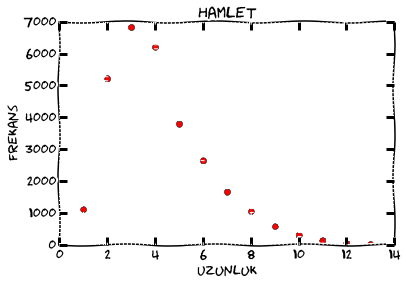

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xkcd() # Grafikleri daha eğlenceli hale getiren bir paket
plt.plot(range(1, len(kelime_cantasi)+1), harf_sayilari, 'ro')
plt.xlabel('Uzunluk')
plt.ylabel('Frekans')
plt.title('Hamlet')
plt.grid(True)